# EDA 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [3]:
cards  = pd.read_csv("Card.csv")

In [4]:
cards = cards[0:56]

In [5]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 24 columns):
Card Name                                56 non-null object
Bank Name                                56 non-null object
URL                                      56 non-null object
Card Type                                56 non-null object
Interest Rate(%)                         54 non-null object
Cash Withdrawal Limit Per transaction    56 non-null object
Cash withdrawal Limit Per day            56 non-null object
Credit Limit(Max)                        43 non-null object
International Transaction Available      56 non-null object
Balance Transfer Available               56 non-null object
Dual currency                            56 non-null object
reward_supplementary_card                56 non-null object
reward_airport_lounge                    56 non-null object
reward_cashback_available                56 non-null object
reward luxary resort/hotel               56 non-null obje

In [6]:
cards.describe()

,Card Name,Bank Name,URL,Card Type,Interest Rate(%),Cash Withdrawal Limit Per transaction,Cash withdrawal Limit Per day,Credit Limit(Max),International Transaction Available,Balance Transfer Available,...,reward luxary resort/hotel,reward insurance plan,reward travel benefits,reward fine dining,reward buffet discount,reward medical discount,reward_shopping,reward airlines ticket,reward point program,EMI available
count,56,56,56,56,54,56,56,43,56,56,...,56,56,56,56,56,56,56,56,56,56
unique,56,15,55,7,6,7,10,13,3,2,...,2,2,2,2,2,2,2,3,2,2
top,AB Bank Debit Card,Dutch Bangla Bank Limited,https://www.midlandbankbd.net/mdb-credit-card/,Credit,N/G,N/G,N/G,N/G,T,F,...,F,F,F,F,F,F,T,F,F,F
freq,1,10,2,25,28,46,42,13,28,42,...,42,51,46,41,44,51,28,45,41,47


In [7]:
cards.isnull().sum()

Card Name                                 0
Bank Name                                 0
URL                                       0
Card Type                                 0
Interest Rate(%)                          2
Cash Withdrawal Limit Per transaction     0
Cash withdrawal Limit Per day             0
Credit Limit(Max)                        13
International Transaction Available       0
Balance Transfer Available                0
Dual currency                             0
reward_supplementary_card                 0
reward_airport_lounge                     0
reward_cashback_available                 0
reward luxary resort/hotel                0
reward insurance plan                     0
reward travel benefits                    0
reward fine dining                        0
reward buffet discount                    0
reward medical discount                   0
reward_shopping                           0
reward airlines ticket                    0
reward point program            

Text(0.5,0,'Bank Name')

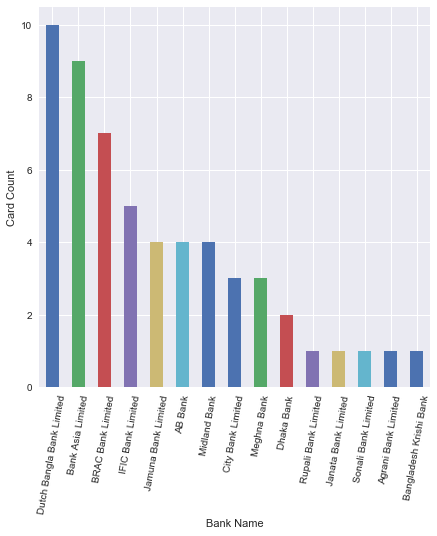

In [8]:
cards['Bank Name'].value_counts().plot(kind='bar',rot=80,figsize=(7,7))
plt.ylabel("Card Count")
plt.xlabel("Bank Name")

# Data Preprocessing 

In [9]:
card_features = cards.drop(['Card Name','URL'],axis=1)

In [10]:
card_features.columns

Index(['Bank Name', 'Card Type', 'Interest Rate(%)',
       'Cash Withdrawal Limit Per transaction',
       'Cash withdrawal Limit Per day', 'Credit Limit(Max)',
       'International Transaction Available', 'Balance Transfer Available',
       'Dual currency', 'reward_supplementary_card', 'reward_airport_lounge',
       'reward_cashback_available', 'reward luxary resort/hotel',
       'reward insurance plan', 'reward travel benefits', 'reward fine dining',
       'reward buffet discount', 'reward medical discount', 'reward_shopping',
       'reward airlines ticket', 'reward point program', 'EMI available'],
      dtype='object')

# Boolean Features 

In [11]:
card_boolean_features = card_features.columns[6:]

In [12]:
card_boolean_features

Index(['International Transaction Available', 'Balance Transfer Available',
       'Dual currency', 'reward_supplementary_card', 'reward_airport_lounge',
       'reward_cashback_available', 'reward luxary resort/hotel',
       'reward insurance plan', 'reward travel benefits', 'reward fine dining',
       'reward buffet discount', 'reward medical discount', 'reward_shopping',
       'reward airlines ticket', 'reward point program', 'EMI available'],
      dtype='object')

In [13]:
card_features[card_boolean_features] = card_features[card_boolean_features].fillna('F')

In [14]:
for feature in card_boolean_features:
    card_features[feature] = card_features[feature].map({'F':0,'T':1})

In [15]:
card_features[card_boolean_features]= card_features[card_boolean_features].fillna(0)

# Interest Rate 

In [16]:
card_features['Interest Rate(%)'] = card_features['Interest Rate(%)'].replace('N/G',np.nan).fillna(-10).astype('float')

In [17]:
interest_rate_conditions = [
    (card_features['Interest Rate(%)'] == 0),
    (card_features['Interest Rate(%)'] == -10),
    (card_features['Interest Rate(%)'] >=1) & (card_features['Interest Rate(%)'] <=10),
    (card_features['Interest Rate(%)'] >=11) & (card_features['Interest Rate(%)'] <=20),
    (card_features['Interest Rate(%)'] >=21) & (card_features['Interest Rate(%)'] <=30),]
    

interest_rate_choices = ['zero','unknown','1-10','11-20','21-30']

In [18]:
card_features['Interest Rate(%)'] = np.select(interest_rate_conditions,interest_rate_choices)

# Credit Limit 

In [19]:
card_features['Credit Limit(Max)'] = card_features['Credit Limit(Max)'].replace('N/G',-10).str.replace(',','').astype('float')

In [20]:
credit_limit_conditions = [
    (card_features['Credit Limit(Max)'] == -10),
    (card_features['Credit Limit(Max)']<=100000),
    (card_features['Credit Limit(Max)']>100000) & (card_features['Credit Limit(Max)']<500000),
    (card_features['Credit Limit(Max)']>500000) & (card_features['Credit Limit(Max)']<1000000),
    (card_features['Credit Limit(Max)']>1000000),
    ]

credit_limit_choices = ['unknown','0-100000','100000-500000','500000-1000000','1000000+']

In [21]:
card_features['Credit Limit(Max)'] = np.select(credit_limit_conditions,credit_limit_choices)

In [22]:
card_features['Credit Limit(Max)'].replace('0','unknown',inplace=True)

# Cash Withdrawal Limit Related Features

In [23]:
card_features.drop(['Cash Withdrawal Limit Per transaction',
                    'Cash withdrawal Limit Per day'],axis=1,inplace=True)

In [24]:
card_features

,Bank Name,Card Type,Interest Rate(%),Credit Limit(Max),International Transaction Available,Balance Transfer Available,Dual currency,reward_supplementary_card,reward_airport_lounge,reward_cashback_available,reward luxary resort/hotel,reward insurance plan,reward travel benefits,reward fine dining,reward buffet discount,reward medical discount,reward_shopping,reward airlines ticket,reward point program,EMI available
0,Sonali Bank Limited,Debit,zero,unknown,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
1,Janata Bank Limited,Debit,zero,unknown,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
2,Agrani Bank Limited,Debit,zero,unknown,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
3,Rupali Bank Limited,Debit,zero,unknown,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
4,Bangladesh Krishi Bank,Debit,zero,unknown,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0
5,AB Bank,Debit,zero,unknown,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0.0,0,0
6,AB Bank,Credit,unknown,unknown,1.0,1,1,1,1,0,1,0,1,1,1,0,1,0.0,0,1
7,AB Bank,Credit,unknown,unknown,1.0,1,1,1,1,0,1,0,1,1,1,0,1,0.0,0,1
8,AB Bank,Credit,unknown,unknown,1.0,1,1,1,1,0,1,0,1,1,1,0,1,0.0,0,1
9,Bank Asia Limited,Debit,zero,unknown,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0


# Feature Creation 

In [25]:
card_features['hajj_card'] = cards['Card Name'].str.contains('Hajj')
card_features['is_visa'] = (cards['Card Name'].str.contains('Visa')) | (cards['Card Name'].str.contains('visa'))
card_features['is_mastercard'] = (cards['Card Name'].str.contains('MasterCard')) | (cards['Card Name'].str.contains('mastercard'))

In [26]:
card_features['Card Type'] = card_features['Card Type'].str.strip()

In [27]:
card_features.isnull().sum()

Bank Name                              0
Card Type                              0
Interest Rate(%)                       0
Credit Limit(Max)                      0
International Transaction Available    0
Balance Transfer Available             0
Dual currency                          0
reward_supplementary_card              0
reward_airport_lounge                  0
reward_cashback_available              0
reward luxary resort/hotel             0
reward insurance plan                  0
reward travel benefits                 0
reward fine dining                     0
reward buffet discount                 0
reward medical discount                0
reward_shopping                        0
reward airlines ticket                 0
reward point program                   0
EMI available                          0
hajj_card                              0
is_visa                                0
is_mastercard                          0
dtype: int64

# Finalized Features (For Now)

In [28]:
card_features = pd.get_dummies(card_features)

In [29]:
card_features.isnull().sum()

International Transaction Available    0
Balance Transfer Available             0
Dual currency                          0
reward_supplementary_card              0
reward_airport_lounge                  0
reward_cashback_available              0
reward luxary resort/hotel             0
reward insurance plan                  0
reward travel benefits                 0
reward fine dining                     0
reward buffet discount                 0
reward medical discount                0
reward_shopping                        0
reward airlines ticket                 0
reward point program                   0
EMI available                          0
hajj_card                              0
is_visa                                0
is_mastercard                          0
Bank Name_AB Bank                      0
Bank Name_Agrani Bank Limited          0
Bank Name_BRAC Bank Limited            0
Bank Name_Bangladesh Krishi Bank       0
Bank Name_Bank Asia Limited            0
Bank Name_City B

# Unsupervised Model Fitting 

In [30]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5) 

In [31]:
neigh.fit(card_features)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

# Query Processing 

In [32]:
card_features.columns

Index(['International Transaction Available', 'Balance Transfer Available',
       'Dual currency', 'reward_supplementary_card', 'reward_airport_lounge',
       'reward_cashback_available', 'reward luxary resort/hotel',
       'reward insurance plan', 'reward travel benefits', 'reward fine dining',
       'reward buffet discount', 'reward medical discount', 'reward_shopping',
       'reward airlines ticket', 'reward point program', 'EMI available',
       'hajj_card', 'is_visa', 'is_mastercard', 'Bank Name_AB Bank',
       'Bank Name_Agrani Bank Limited', 'Bank Name_BRAC Bank Limited',
       'Bank Name_Bangladesh Krishi Bank', 'Bank Name_Bank Asia Limited',
       'Bank Name_City Bank Limited', 'Bank Name_Dhaka Bank',
       'Bank Name_Dutch Bangla Bank Limited', 'Bank Name_IFIC Bank Limited',
       'Bank Name_Jamuna Bank Limited', 'Bank Name_Janata Bank Limited',
       'Bank Name_Meghna Bank', 'Bank Name_Midland Bank',
       'Bank Name_Rupali Bank Limited', 'Bank Name_Sonali Bank 

In [33]:
example_query = {'International Transaction Available':1, 
                 'Balance Transfer Available':0,
                 'Dual currency':1, 
                 'reward_supplementary_card':0, 
                 'reward_airport_lounge':1,
                 'reward_cashback_available':0, 
                 'reward luxary resort/hotel':1,
                 'reward insurance plan':0, 
                 'reward travel benefits':1, 
                 'reward fine dining':1,
                 'reward buffet discount':1, 
                 'reward medical discount':0, 
                 'reward_shopping':1,
                 'reward airlines ticket':1, 
                 'reward point program':0,
                 'EMI available':0,
                 'hajj_card':0, 
                 'is_visa':0, 
                 'is_mastercard':1, 
                 'Bank Name_AB Bank':0,
                 'Bank Name_Agrani Bank Limited':0, 
                 'Bank Name_BRAC Bank Limited':0,
                 'Bank Name_Bangladesh Krishi Bank':0, 
                 'Bank Name_Bank Asia Limited':1,
                 'Bank Name_City Bank Limited':1, 
                 'Bank Name_Dhaka Bank':1,
                 'Bank Name_Dutch Bangla Bank Limited':1, 
                 'Bank Name_IFIC Bank Limited':0,
                 'Bank Name_Jamuna Bank Limited':0, 
                 'Bank Name_Janata Bank Limited':0,
                 'Bank Name_Meghna Bank':0, 
                 'Bank Name_Midland Bank':0,
                 'Bank Name_Rupali Bank Limited':0, 
                 'Bank Name_Sonali Bank Limited':0,
                 'Card Type_Credit':1, 
                 'Card Type_Credit(Women only)':0,
                 'Card Type_Debit':0, 
                 'Card Type_Prepaid':0,
                 'Card Type_Prepaid International':0, 
                 'Card Type_Virtual Prepaid':0,
                 'Interest Rate(%)_1-10':1, 
                 'Interest Rate(%)_11-20':0,
                 'Interest Rate(%)_21-30':0, 
                 'Interest Rate(%)_unknown':1,
                 'Interest Rate(%)_zero':1, 
                 'Credit Limit(Max)_0-100000':0, 
                 'Credit Limit(Max)_100000-500000':1,
                 'Credit Limit(Max)_1000000+':0, 
                 'Credit Limit(Max)_unknown':0
                 }

In [35]:
len(example_query.keys()) == len(card_features.columns)

True

In [47]:
results = neigh.kneighbors(pd.Series(example_query).values.reshape((1,49)))

In [50]:
indices = results[1]

In [51]:
scores = results[0]

In [62]:
indices[0].tolist()

[27, 18, 31, 6, 8]

# Result Preview

In [65]:
cards.iloc[indices[0].tolist(),:]["Card Name"]

27    City Bank American Express Credit Card
18                  Brac Bank Signature Card
31    Dutch Bangla VISA platinum Credit Card
6                   AB Bank World MasterCard
8                    AB Bank Gold MasterCard
Name: Card Name, dtype: object